#  **Data Import**

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn import tree


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Sem II/WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# **Data Understanding**

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
print("Shape of Data:",data.shape)


Shape of Data: (1143, 13)


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

#**Data Preparation**

In [ ]:
df=pd.DataFrame(data)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
df.shape

(1143, 13)

In [ ]:
print("Total Null Values in the columns:\n",df.isnull().sum())

Total Null Values in the columns:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Removing 'Id' columns from the dataset

In [ ]:
df.drop(columns="Id",inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print("Shape after deleting the Id Columns:",df.shape)

Shape after deleting the Id Columns: (1143, 12)


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Converting the 'quality' columns values on a scale of 0-5 while 0 be bad quality and 5 be the best quality

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'].replace([3,4,5,6,7,8],[11,12,13,14,15,16],inplace=True)
df['quality'].replace([11,12,13,14,15,16],[0,1,2,3,4,5],inplace=True)


In [ ]:
df['quality'].unique()

array([2, 3, 4, 1, 5, 0])

Checking Skewness of Data

In [ ]:
df.skew()

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
dtype: float64

Checking the kurtosis of data

In [ ]:
df.kurt()

fixed acidity            1.384614
volatile acidity         1.375531
citric acid             -0.714686
residual sugar          27.675366
chlorides               47.078324
free sulfur dioxide      1.932170
total sulfur dioxide     5.098748
density                  0.888123
pH                       0.925791
sulphates               12.017377
alcohol                  0.221179
quality                  0.314664
dtype: float64

#**EDA**

<ipython-input-20-6e5e617b432b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=df,palette='Greens',)


<Axes: xlabel='quality', ylabel='count'>

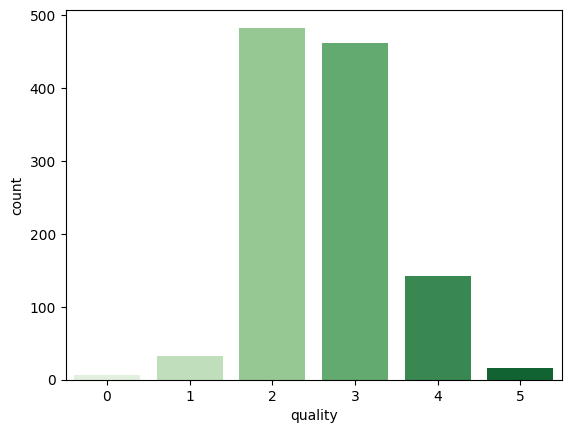

In [ ]:
sns.countplot(x='quality',data=df,palette='Greens',)

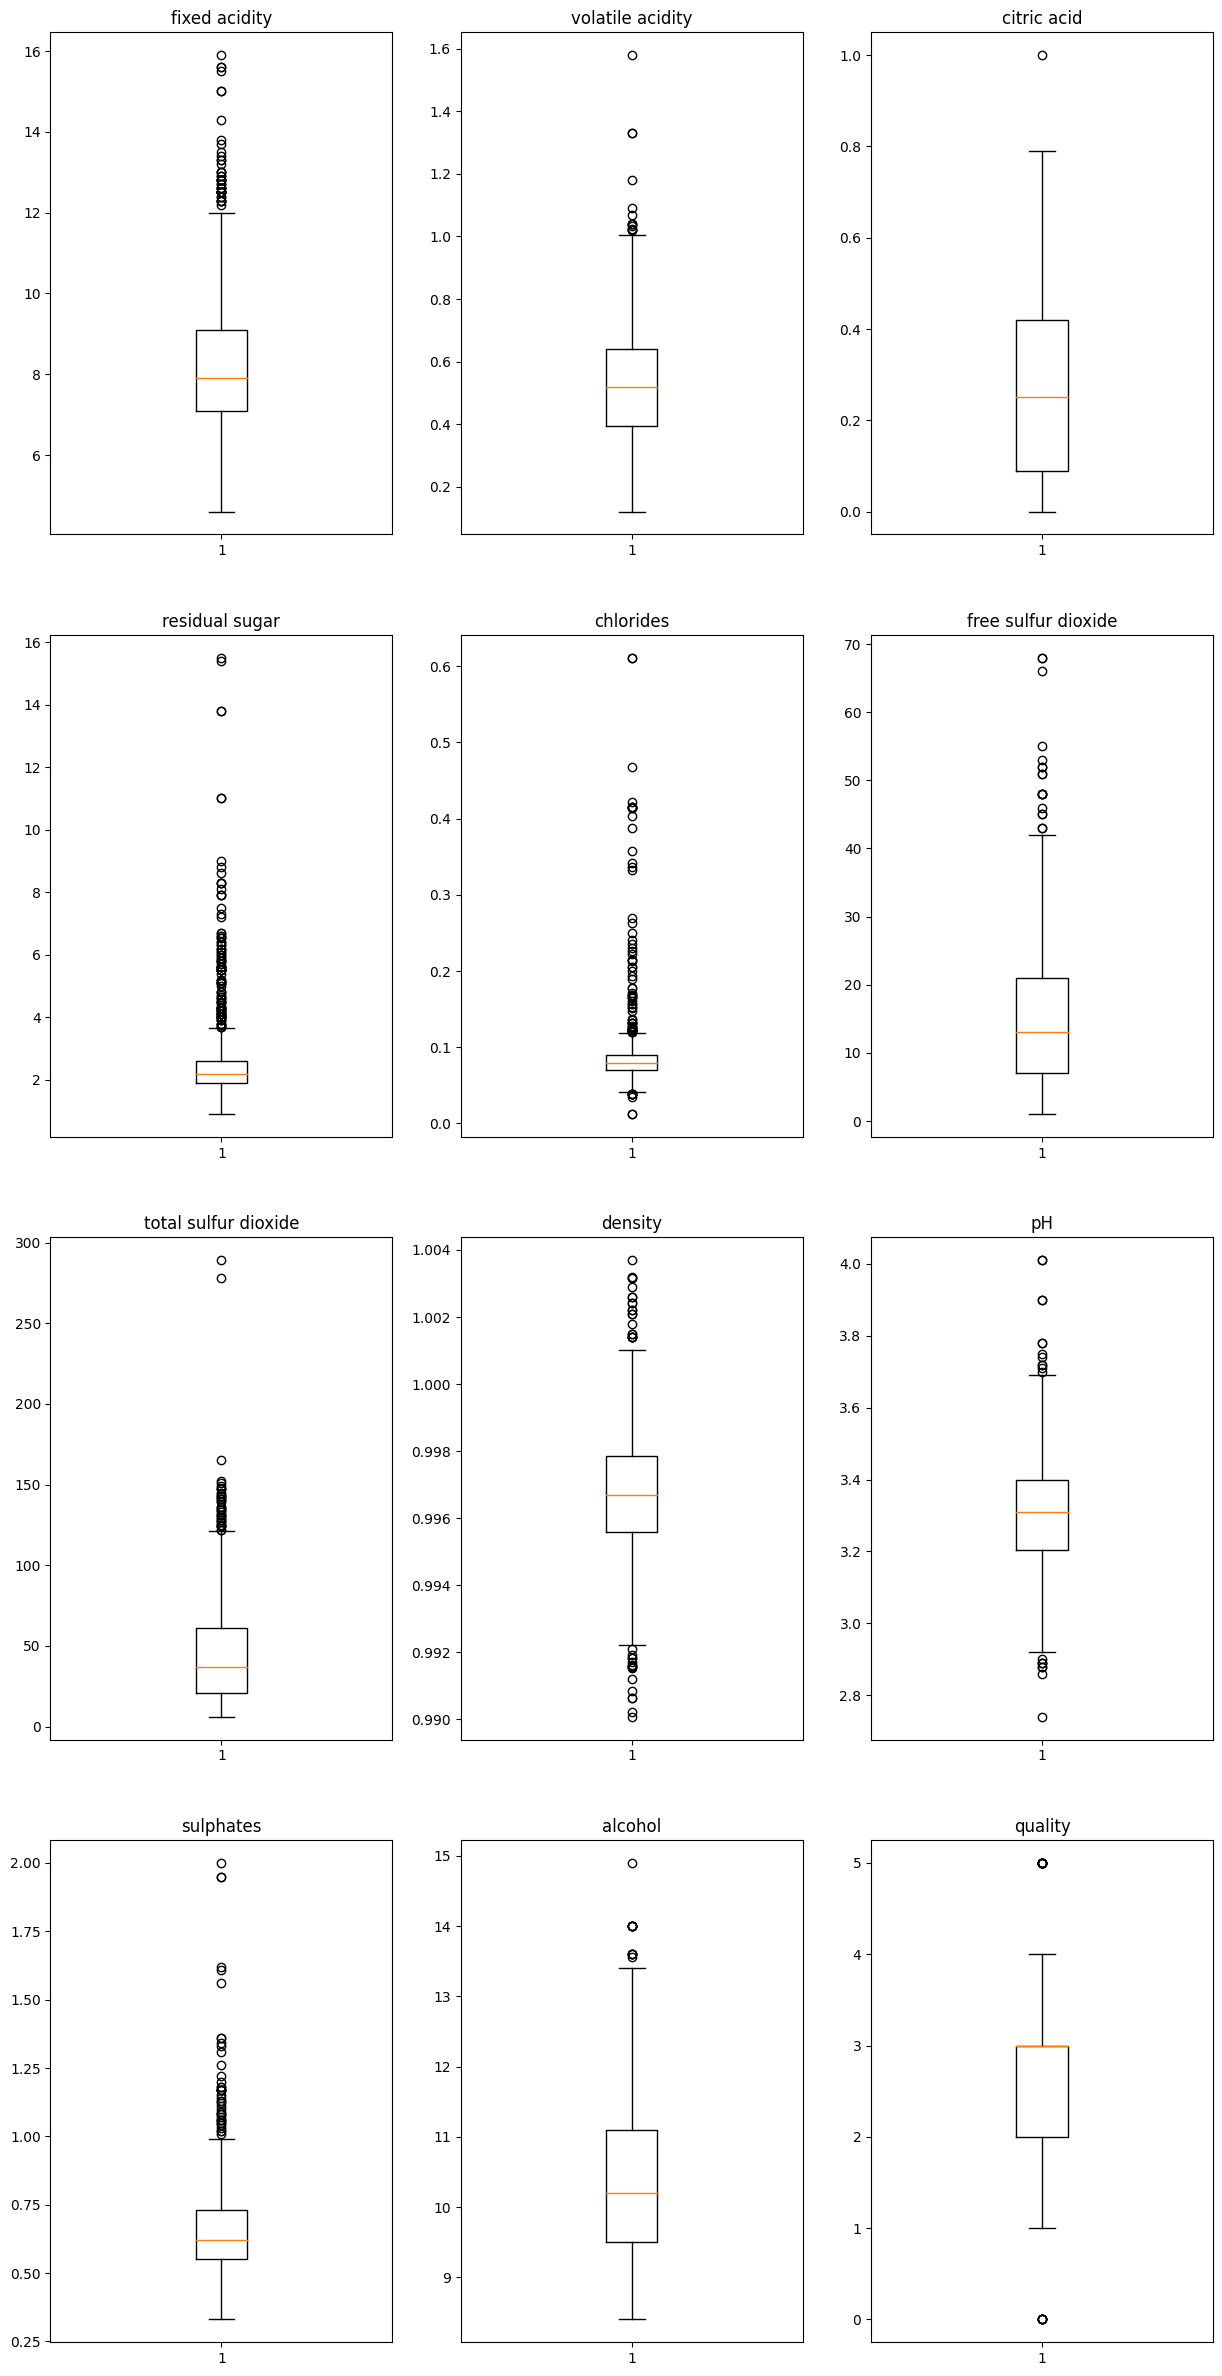

In [ ]:
count = 1
plt.figure(figsize = (15,30))
for i, column in enumerate(df.columns, start=1):
  if count < 13:

    plt.subplot(4, 3, count)
    count += 1
    plt.boxplot(df[column])
    plt.title(column)


plt.show()

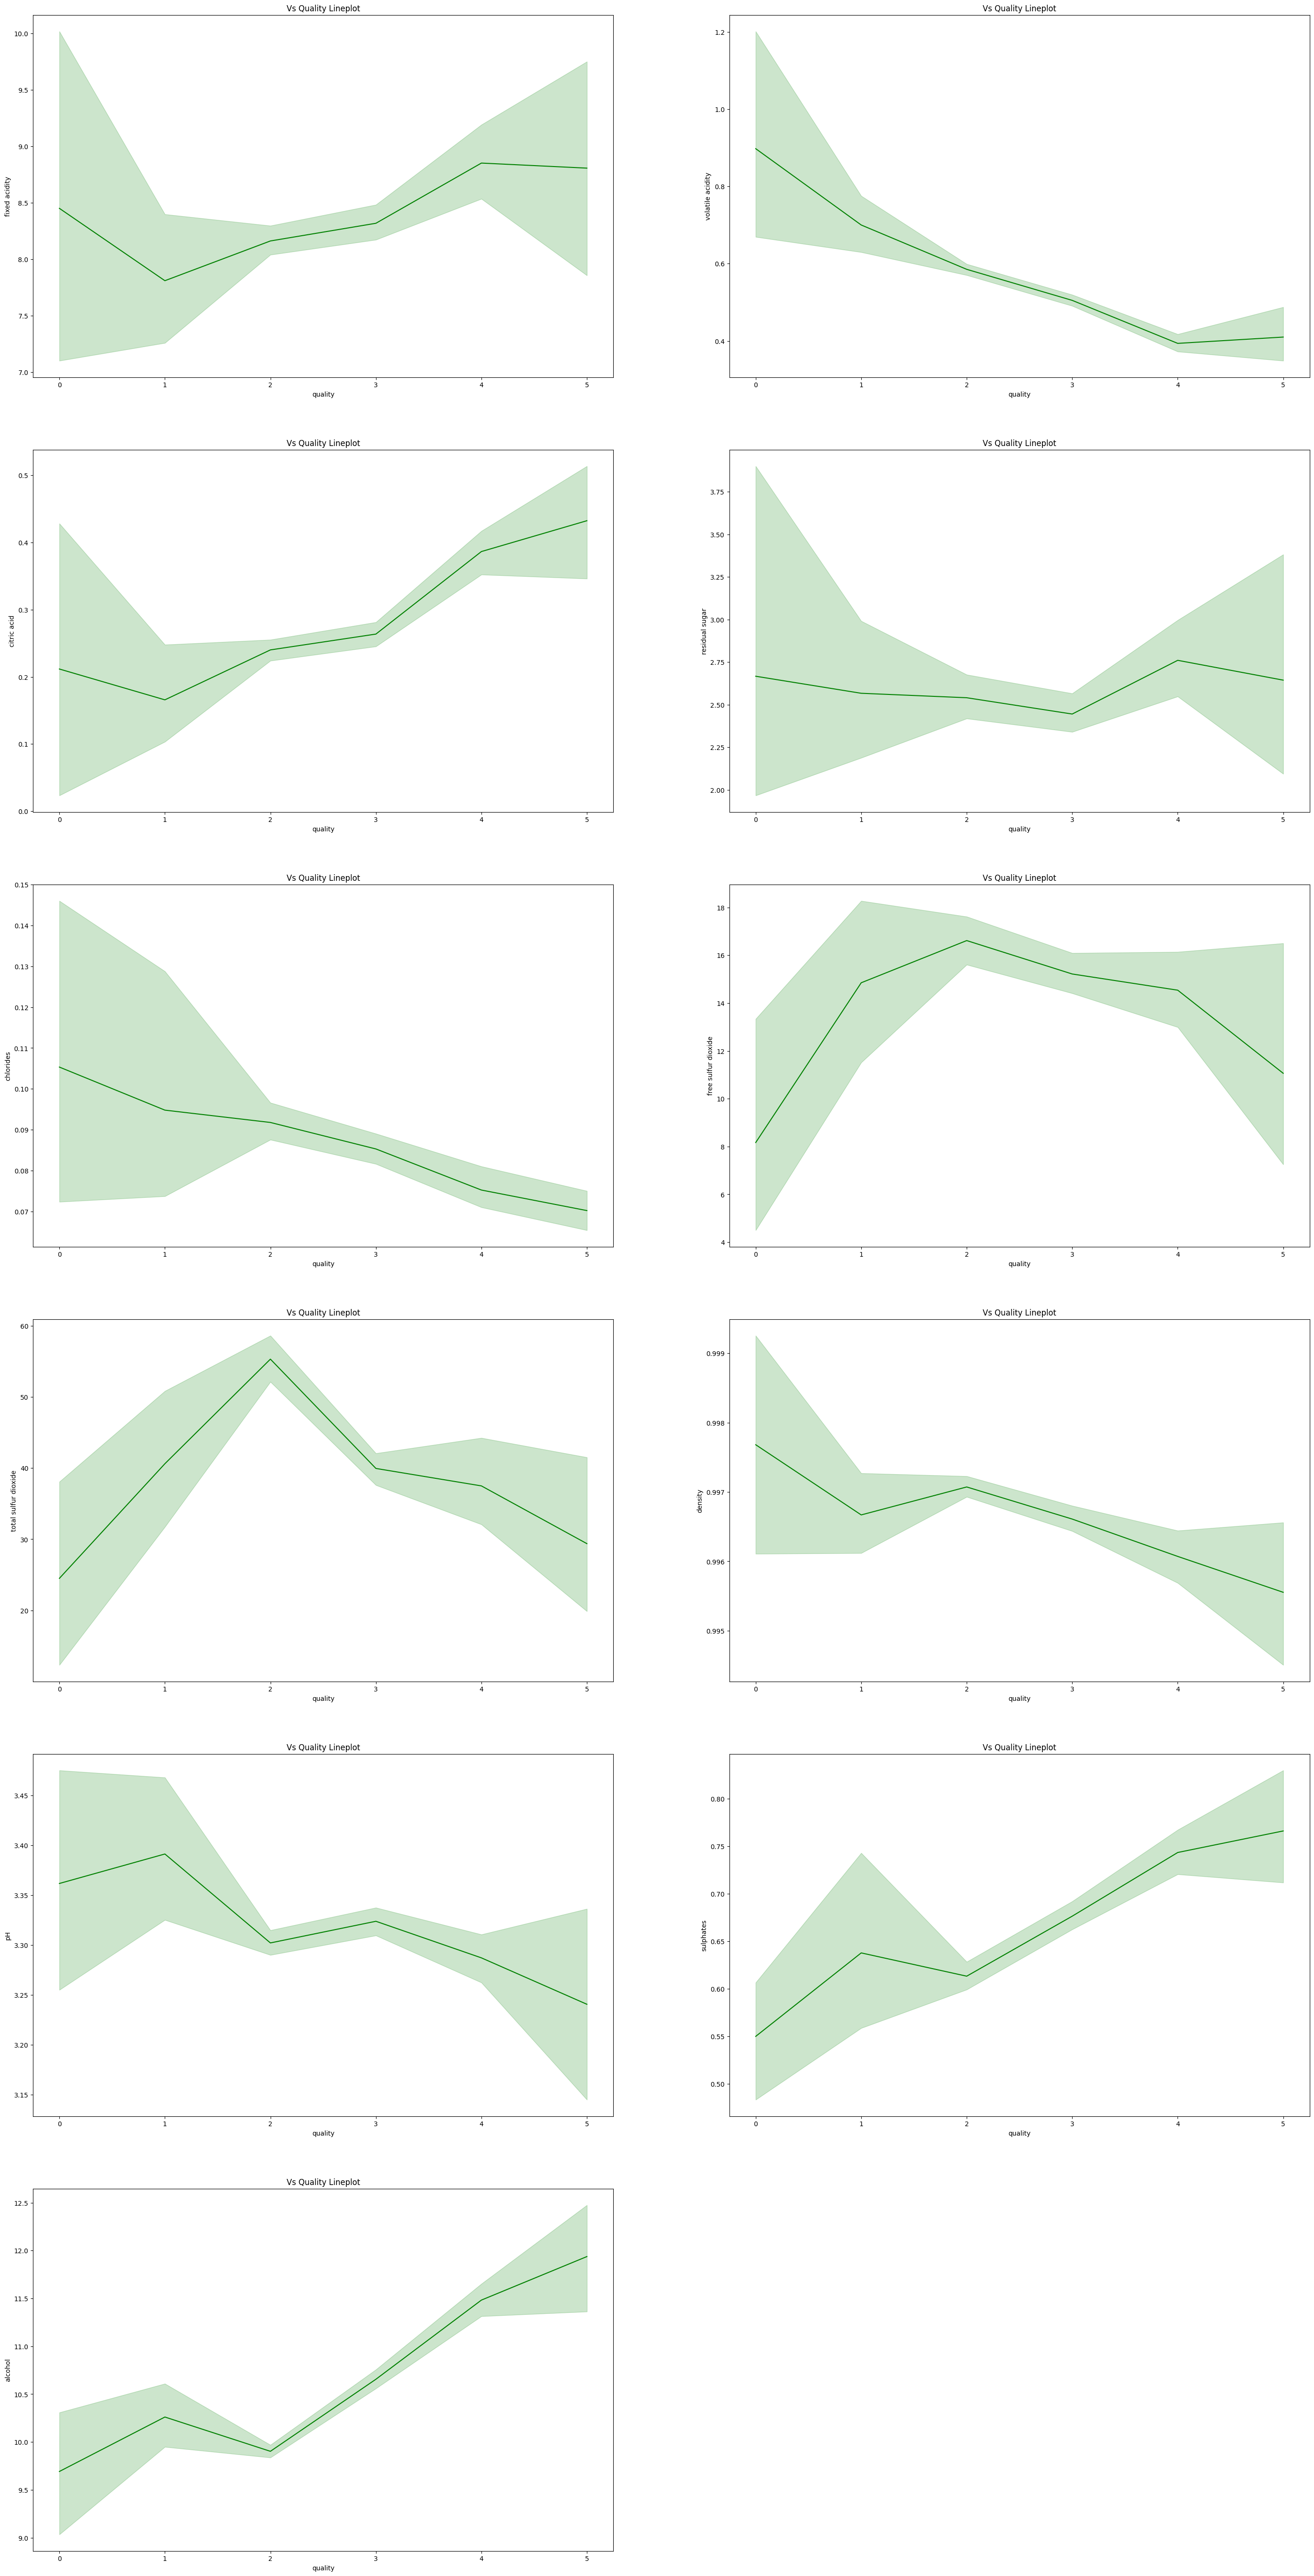

In [ ]:
j=1
plt.figure(figsize=(35,70))
for i in(df.columns):
  if j<13:
    if i!="quality":
      plt.subplot(6,2,j)
      j+=1
      sns.lineplot(data=df,x=df['quality'],y=df[i],color='g')
      plt.title("Vs Quality Lineplot")
plt.show()

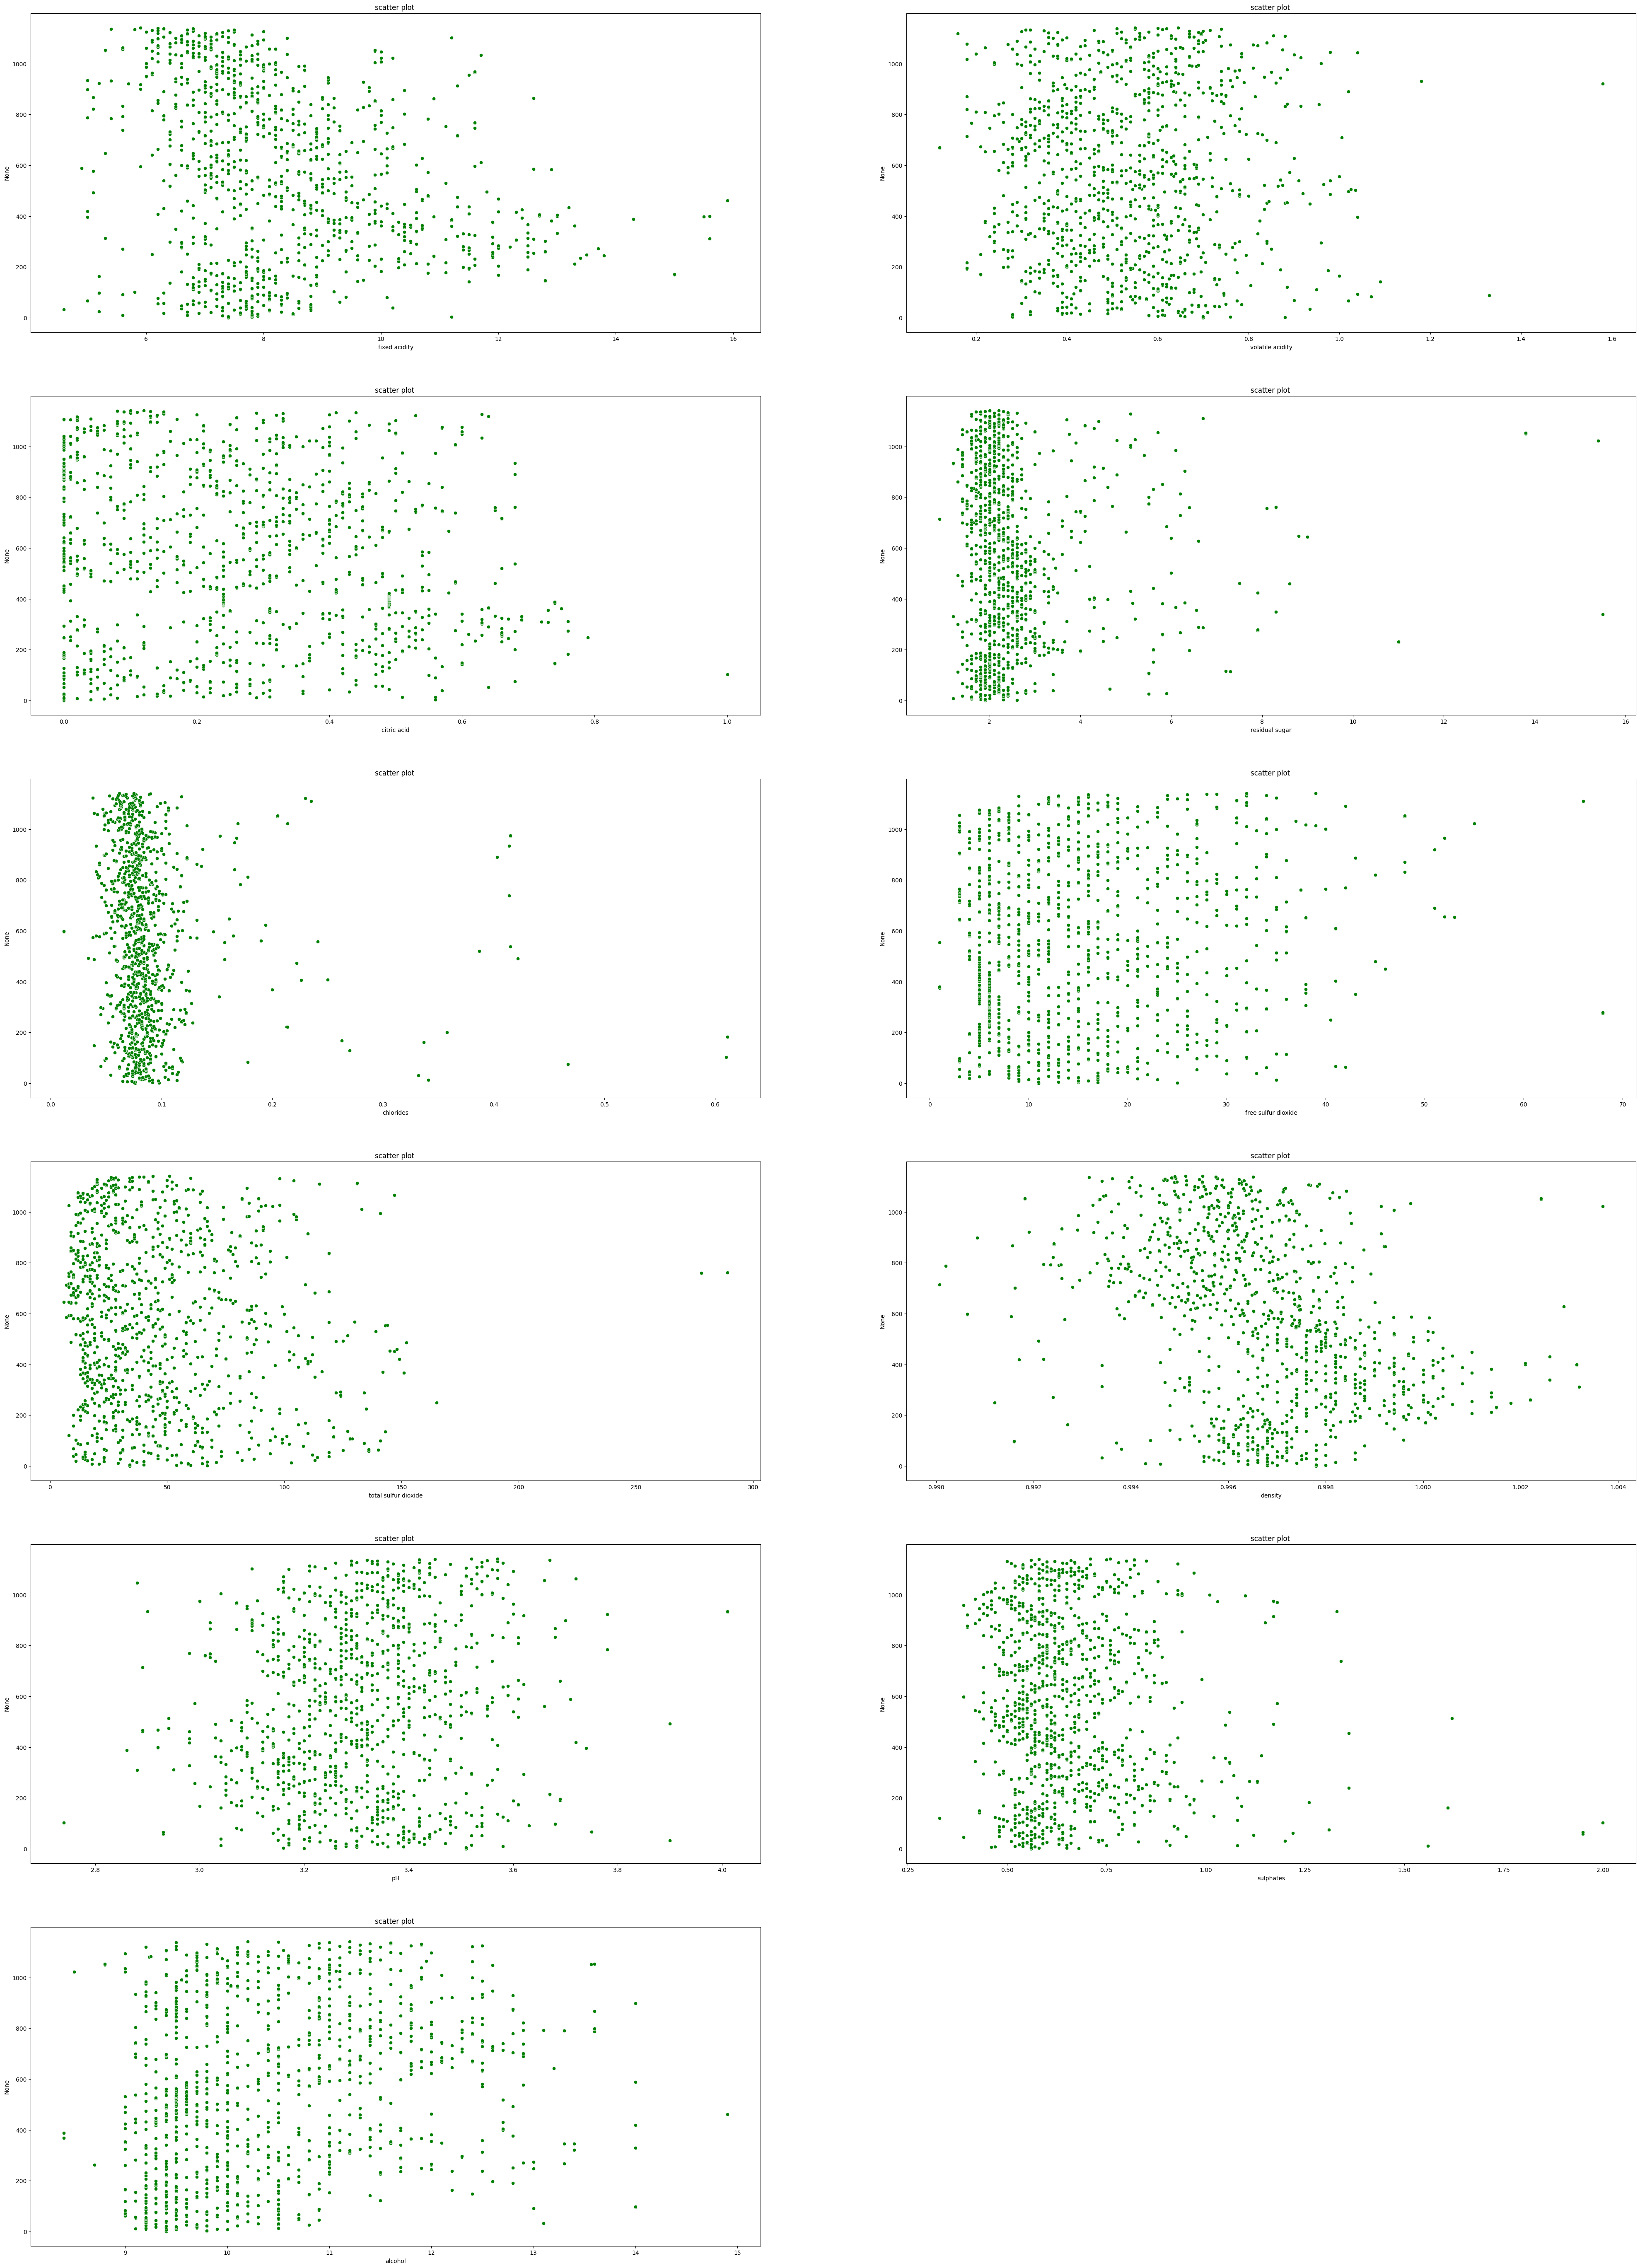

In [ ]:
j=1
plt.figure(figsize=(50,70))
for i in(df.columns):
  if j<13:
    if i!="quality":
      plt.subplot(6,2,j)
      j+=1
      sns.scatterplot(data=df,x=df[i],y=df[i].index,color='green')
      plt.title("scatter plot ")
plt.show()

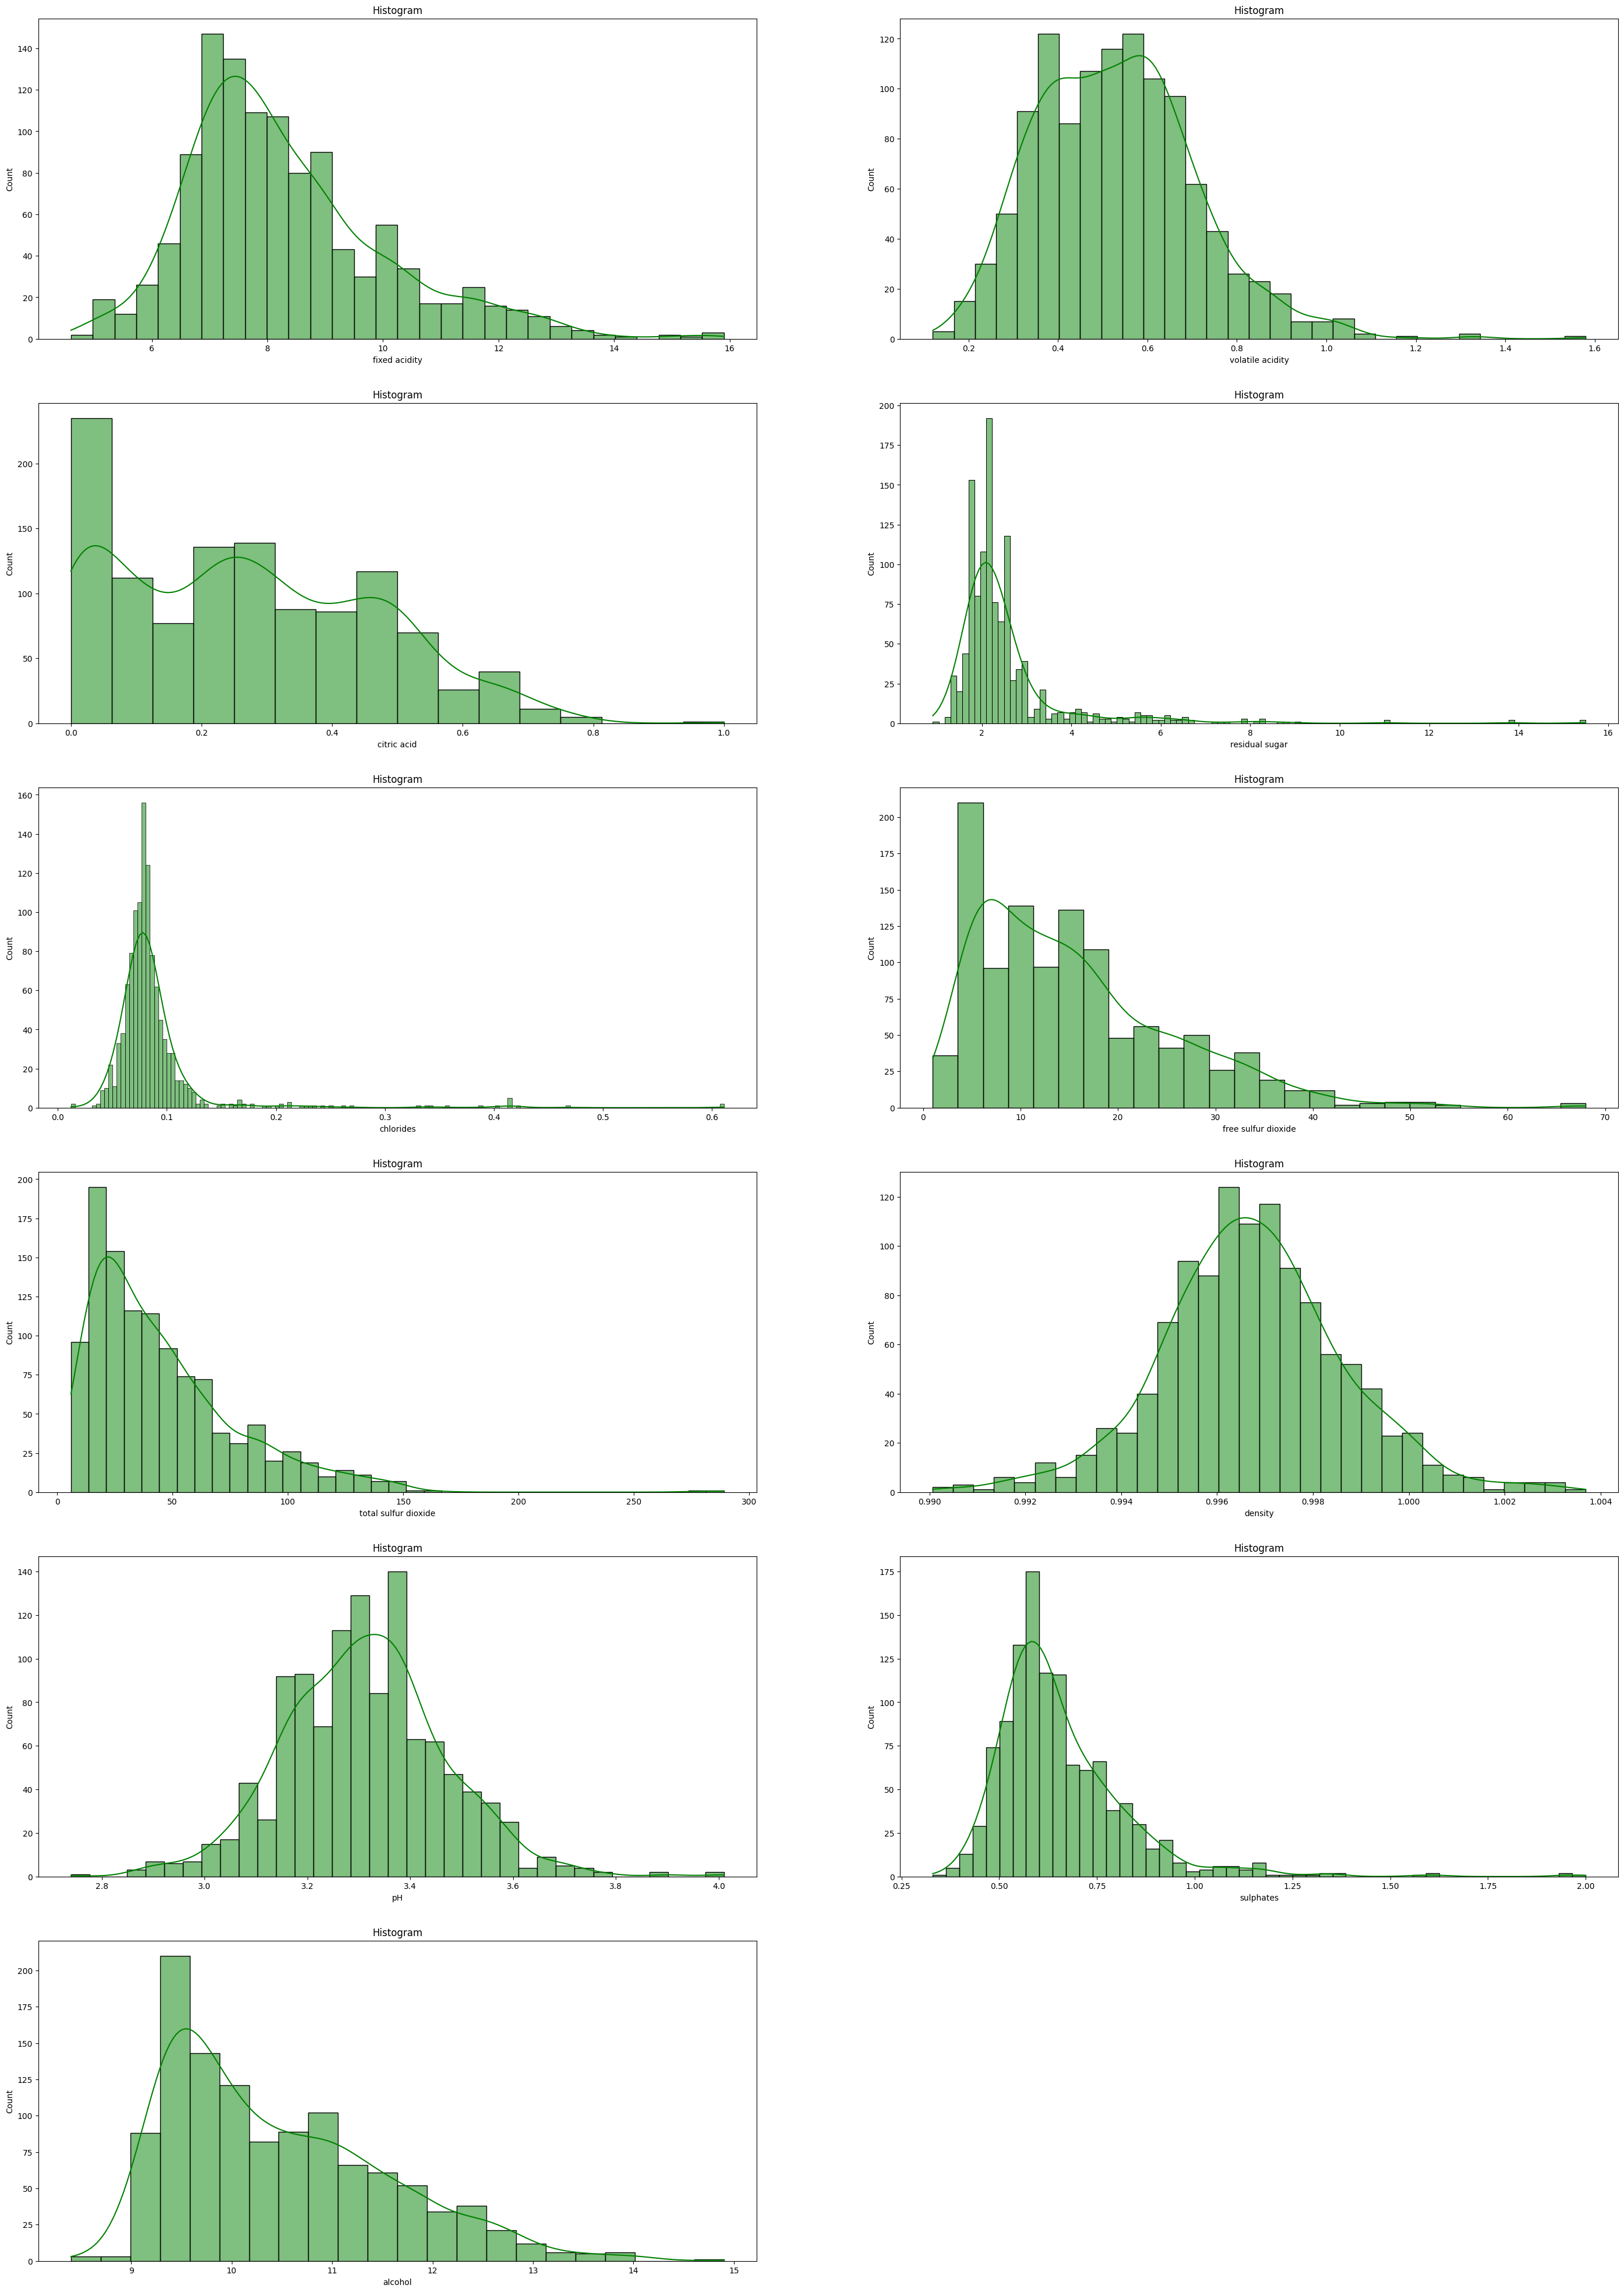

In [ ]:
j=1
plt.figure(figsize=(35,50))
for i in(df.columns):
  if j<13:
    if i!='quality':
      plt.subplot(6,2,j)
      j+=1
      sns.histplot(x=df[i],color="Green",kde=True)
      #sns.kdeplot(data=df,x=df[i],color='r')
      plt.title('Histogram')
plt.show()

Checking the Corelation of different columns of dataset

In [ ]:
df.corr().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.25,0.67,0.17,0.11,-0.16,-0.11,0.68,-0.69,0.17,-0.08,0.12
volatile acidity,-0.25,1.00,-0.54,-0.01,0.06,-0.00,0.08,0.02,0.22,-0.28,-0.20,-0.41
citric acid,0.67,-0.54,1.00,0.18,0.25,-0.06,0.04,0.38,-0.55,0.33,0.11,0.24
residual sugar,0.17,-0.01,0.18,1.00,0.07,0.17,0.19,0.38,-0.12,0.02,0.06,0.02
chlorides,0.11,0.06,0.25,0.07,1.00,0.02,0.05,0.21,-0.28,0.37,-0.23,-0.12
free sulfur dioxide,-0.16,-0.00,-0.06,0.17,0.02,1.00,0.66,-0.05,0.07,0.03,-0.05,-0.06
total sulfur dioxide,-0.11,0.08,0.04,0.19,0.05,0.66,1.00,0.05,-0.06,0.03,-0.19,-0.18
density,0.68,0.02,0.38,0.38,0.21,-0.05,0.05,1.00,-0.35,0.14,-0.49,-0.18
pH,-0.69,0.22,-0.55,-0.12,-0.28,0.07,-0.06,-0.35,1.00,-0.19,0.23,-0.05
sulphates,0.17,-0.28,0.33,0.02,0.37,0.03,0.03,0.14,-0.19,1.00,0.09,0.26


<Axes: >

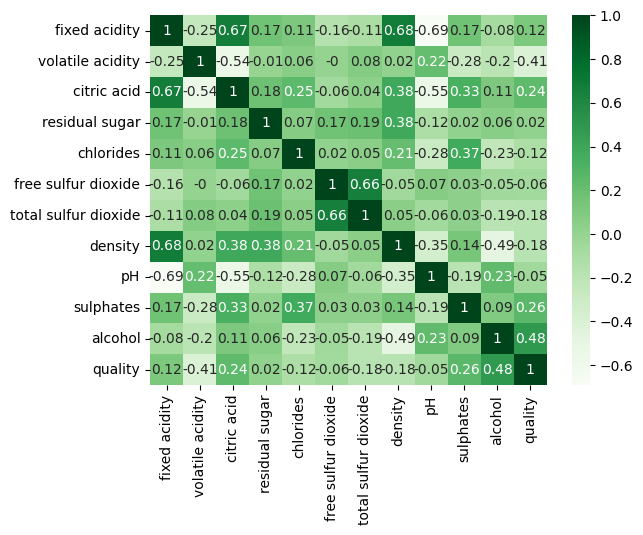

In [ ]:
c=df.corr().round(2)
sns.heatmap(c,annot=True,cmap='Greens')

<Axes: >

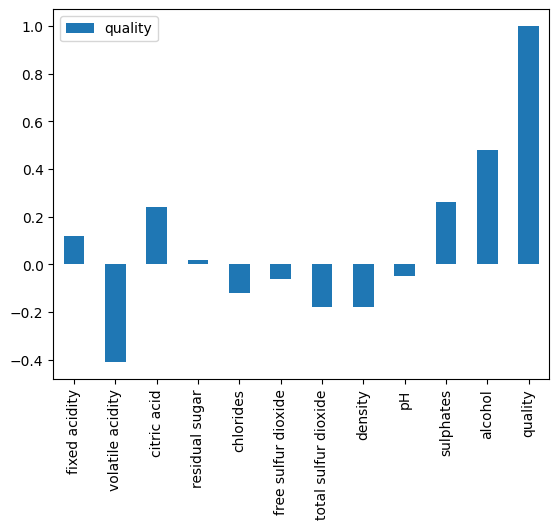

In [ ]:
q=df.corr().round(2)
q[['quality']].plot(kind='bar')
#sns.heatmap(q,annot=True,colour='Greens')



*   alcohol has the greatest value of correlation, a correlation value of positive +0.48
*   volatile acidity has a correlation value of  negative -0.41
*   sulphates has a correlation value of  positive +0.26
*   citric acid has a correlation value of  positive +0.24






<ipython-input-28-d75d0cad92e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=df['alcohol'],x=df['quality'],palette='Greens')


<Axes: xlabel='quality', ylabel='alcohol'>

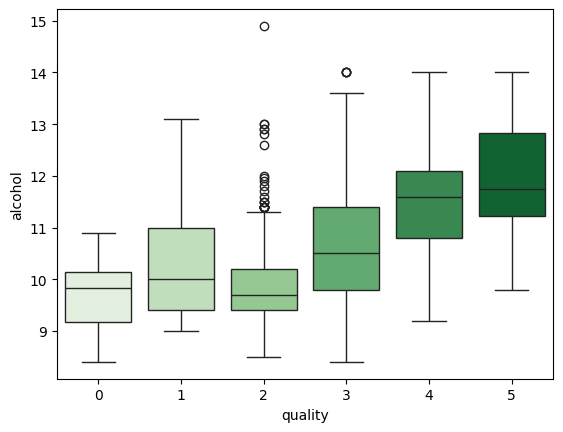

In [ ]:
sns.boxplot(data=df,y=df['alcohol'],x=df['quality'],palette='Greens')



*   It can be seen in the boxplot that wines of higher levels of alcohol usually have better quality ratings




<ipython-input-29-2f1d83ccdff4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=df['sulphates'],x=df['quality'],palette='Greens')


<Axes: xlabel='quality', ylabel='sulphates'>

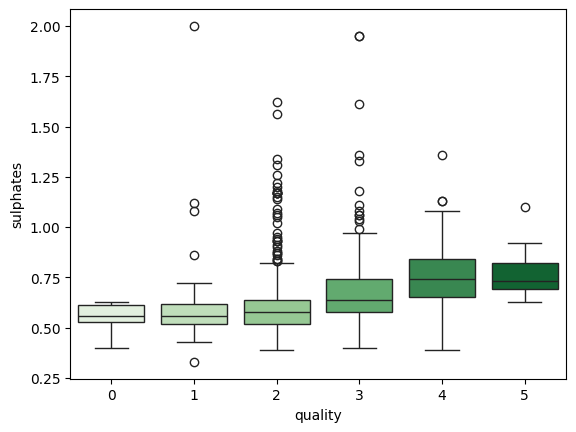

In [ ]:
sns.boxplot(data=df,y=df['sulphates'],x=df['quality'],palette='Greens')

<ipython-input-30-337b88efb33b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=df['citric acid'],x=df['quality'],palette='Greens')


<Axes: xlabel='quality', ylabel='citric acid'>

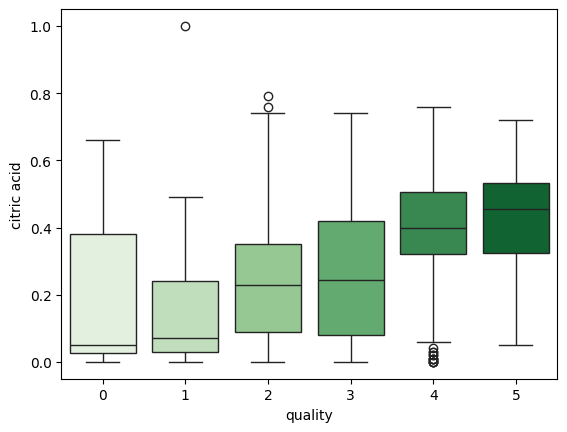

In [ ]:
sns.boxplot(data=df,y=df['citric acid'],x=df['quality'],palette='Greens')

<ipython-input-31-c7d013db5e3d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=df['volatile acidity'],x=df['quality'],palette='Greens')


<Axes: xlabel='quality', ylabel='volatile acidity'>

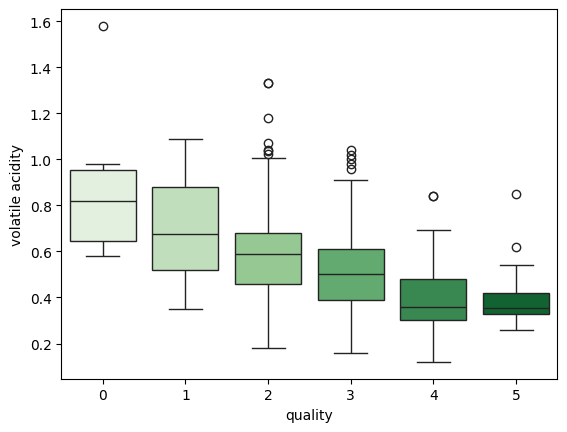

In [ ]:
sns.boxplot(data=df,y=df['volatile acidity'],x=df['quality'],palette='Greens')


#**Data Modelling**

Creating  features(X) and Target variable(y)

In [ ]:
X=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (1143, 11)
shape of y:  (1143,)


Spliting dataset into training and testing

With 80% of data as training and 20% of data as testing


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print('Shape of the X_train:',X_train.shape)
print('Shape of the X_test:',X_test.shape)
print('Shape of the y_train:',y_train.shape)
print('Shape of the y_test:',y_test.shape)

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


###**Decision Tree Classification**

In [ ]:
parameters={'max_depth':[3,5,7,10,13,15,17,20]}

Tree_model=DecisionTreeClassifier()
clf=GridSearchCV(Tree_model,parameters)
print("Searching for best hyperparameters..")
clf.fit(X_train,y_train)
print("Best Hyperparameters: ",clf.best_params_)

model_comparison={}

y_pred=clf.predict(X_test)
model_comparison['DecisionTreeClassifier']=[accuracy_score(y_test,y_pred),f1_score(y_test,y_pred,average='weighted')]

print(classification_report(y_test,y_pred,zero_division=1))

confusionmatrix=confusion_matrix(y_test,y_pred)
confusionmatrix

Searching for best hyperparameters..
Best Hyperparameters:  {'max_depth': 17}
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.11      0.17      0.13         6
           2       0.63      0.58      0.61        96
           3       0.54      0.52      0.53        99
           4       0.47      0.58      0.52        26
           5       1.00      0.00      0.00         2

    accuracy                           0.54       229
   macro avg       0.46      0.47      0.30       229
weighted avg       0.56      0.54      0.54       229



array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  2,  1,  0],
       [ 3,  6, 56, 29,  2,  0],
       [ 2,  2, 31, 51, 13,  0],
       [ 0,  0,  0, 11, 15,  0],
       [ 0,  0,  0,  1,  1,  0]])

###**KNeighbors Classifier**

In [ ]:
parameters = {'n_neighbors': [10,20,30,40,50]}

K_model = KNeighborsClassifier()

clf = GridSearchCV(K_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['KNeighborsClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))
confusion_matrix(y_test,y_pred)

Searching for best hyperparameters ...
Best Hyperparameters: {'n_neighbors': 10}


              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       0.55      0.71      0.62        96
           3       0.48      0.45      0.47        99
           4       0.45      0.19      0.27        26
           5       1.00      0.00      0.00         2

    accuracy                           0.52       229
   macro avg       0.70      0.27      0.27       229
weighted avg       0.52      0.52      0.49       229



array([[ 0,  3,  3,  0,  0],
       [ 0, 68, 28,  0,  0],
       [ 0, 48, 45,  6,  0],
       [ 0,  5, 16,  5,  0],
       [ 0,  0,  2,  0,  0]])

###**Random Forest**

In [ ]:
parameters = {'n_estimators': [160,180,200], 'max_depth':[18,20,22,24]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['RandomForestClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))


Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 18, 'n_estimators': 160}


              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       0.72      0.78      0.75        96
           3       0.65      0.67      0.66        99
           4       0.65      0.58      0.61        26
           5       1.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.80      0.40      0.40       229
weighted avg       0.69      0.68      0.67       229



#**Model Evaluation**

In [ ]:
model_comparison1=pd.DataFrame.from_dict(model_comparison).T
model_comparison1.columns=['Accuracy','F1 Score']
model_comparison1

,Accuracy,F1 Score
DecisionTreeClassifier,0.537118,0.544491
KNeighborsClassifier,0.515284,0.491434
RandomForestClassifier,0.681223,0.667831


<ipython-input-40-72288fd2f29d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_comparison1,y=model_comparison1.index,x=model_comparison1['Accuracy'],palette='Blues')


<Axes: xlabel='Accuracy', ylabel='None'>

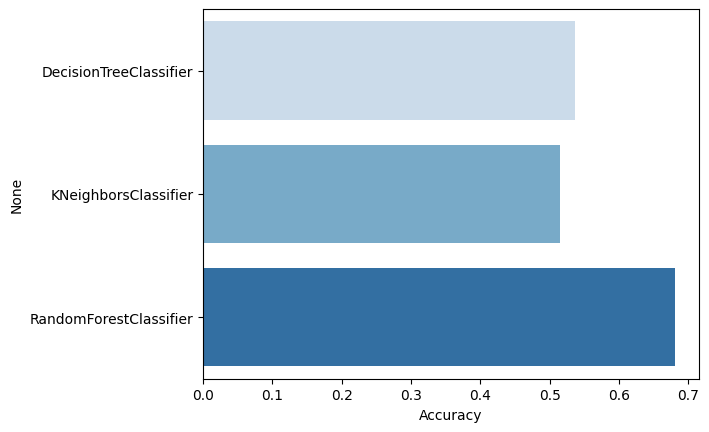

In [ ]:
sns.barplot(data=model_comparison1,y=model_comparison1.index,x=model_comparison1['Accuracy'],palette='Blues')